# Анализ изменения цены лечения в 2022 году относительно 2021 года в медицинской клинике.

### Описание данных

- `record_id` - уникальный идентификатор строки данных
- `service_date` - дата оказания медицинской услуги
- `service_name` - наименование медицинской услуги
- `service_number` - количество услуг
- `service_amount` - сумма выплат (стоимость оказанных услуг в рублях)
- `insured` - уникальный идентификатор пациента
- `sex_id` - пол пациента
- `age_for_service_date` - возраст пациента

## Изучение и предобработка данных

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [100]:
data = pd.read_excel('data_test_task_2022.xlsx', sheet_name='Sheet1')
display(data.head())

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [5]:
# Проверим данные на пропуски и дубликаты
print('Число дубликатов:', data.duplicated().sum())
print('Число пропусков:')
print(data.isna().sum())

Число дубликатов: 0
Число пропусков:
record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64


Явных дубликатов нет, но есть 21 пропущенное значение в столбце с полом пациента.

In [6]:
# Изучим подробнее строки с пропусками
data.query('sex_id != 1.0 and sex_id != 2.0')

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


У нас есть  только 2 человека, у которых не указан пол. По услугам не получится угадать пол пациента и поскольку пропусков немного, это не окажет большого вляиния на исследование, потому просто оставим, как есть.

In [7]:
# Также нужно изменить тип данных в столбце с датой на соответсвующий формат.
data['service_date'] = pd.to_datetime(data['service_date'])
data['month']= pd.to_datetime(data['service_date']).dt.strftime('%Y-%m')
data['year'] = pd.to_datetime(data['service_date']).dt.strftime('%Y')

## Исследовательский анализ

Для начала определим, насколько изменилась цена и в какую сторону.

In [8]:
# вычислим среднюю стоимость услуг по годам
price_by_year = data.groupby('year', as_index=False)['service_amount'].mean().round(2).T
difference = round(((price_by_year.loc['service_amount',1] - price_by_year.loc['service_amount',0]) / price_by_year.loc['service_amount',0]) * 100, 2)

display(price_by_year)
print()
print(f'Средняя цена за 2022 относительно 2021 изменилась на {difference}%')

,0,1
year,2021,2022
service_amount,1138.98,1195.47



Средняя цена за 2022 относительно 2021 изменилась на 4.96%


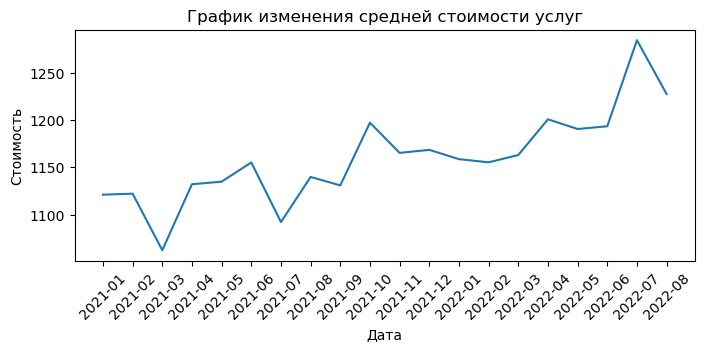

In [9]:
# и построим график изменение цены по месяцам
mean_price = data.groupby('month', as_index=False)['service_amount'].mean()

plt.figure(figsize=(8, 3))
sns.lineplot(data=mean_price, x='month', y='service_amount')
plt.xticks(rotation=45)
plt.title('График изменения средней стоимости услуг')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.show()

Мы видим, что данные за 2022 год есть только за 8 месяцев. Чтобы исключить влияние сезонных факторов, нужно будет сравнивать данные за первые 8 месяцев каждого года.

## Проверка гипотез

### Средняя стоимость обслуживания пациентов увеличилась из-за изменения цен на услуги

In [10]:
# разделим данные по годам и оставим в 2021 только 8 месяцев
data_2021 = data[data['year'] == '2021']
data_2021 = data[data['month'] < '2021-09'] 

data_2022 = data[data['year'] == '2022']

In [11]:
# создадим таблицы с ценами на услуги за 2021 и 2022 года
mean_price_2021 = data_2021.groupby('service_name', as_index=False)['service_amount'].mean()
display(mean_price_2021.head())

mean_price_2022 = data_2022.groupby('service_name', as_index=False)['service_amount'].mean()
display(mean_price_2022.head())

,service_name,service_amount
0,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",1449.0
1,25-OH витамин D (25-гидроксихолекальциферол),3255.0
2,Bordetella pertussis (Слюна),462.0
3,CMV (цитомегаловирус) (Кровь),378.0
4,CMV (цитомегаловирус) (Слюна),378.0


,service_name,service_amount
0,"(1 E)Аллергопанель IgE (Молоко коровье, Молоко...",1520.0
1,"(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная...",1520.0
2,"(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, ...",1520.0
3,"(4 E)Аллергопанель IgE (Говядина, Телятина, Св...",1520.0
4,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",1520.0


In [12]:
# объединим таблицы с ценами по наименованию услуг, которые есть в обеих таблицах
price_difference_table = mean_price_2021.merge(mean_price_2022, how='inner', on='service_name')
price_difference_table.columns = ['service_name', 'price_2021', 'price_2022']

# посчитаем разницу в процентах
price_difference_table['difference, %'] = ((price_difference_table['price_2022'] - price_difference_table['price_2021']) / price_difference_table['price_2021']) * 100

price_difference = round(price_difference_table['difference, %'].mean(), 2)

display(price_difference_table.head())
print()
print(f'В среднем цена в 2022 году на одни и те же услуги выше на {price_difference}%, чем в 2021')

,service_name,price_2021,price_2022,"difference, %"
0,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",1449.0,1520.0,4.899931
1,25-OH витамин D (25-гидроксихолекальциферол),3255.0,3420.0,5.069124
2,CMV (цитомегаловирус) (Кровь),378.0,400.0,5.820106
3,CMV (цитомегаловирус) (Слюна),378.0,400.0,5.820106
4,CMV (цитомегаловирус) (Соскоб),378.0,400.0,5.820106



В среднем цена в 2022 году на одни и те же услуги выше на 5.73%, чем в 2021


### Средняя стоимость обслуживания увеличилась из-за изменения интенсивности лечения пациентов

Посмотрим, изменилось ли среднне количество посещений клиники на одного человека. Также вычислим и медианное значение, чтобы исключить людей с обширной программой лечения.

In [13]:
services_count_2021 = data_2021.groupby('insured')['service_name'].count()

print(services_count_2021.mean())
print(services_count_2021.median())

15.427582227351413
8.0


In [14]:
services_count_2022 = data_2022.groupby('insured')['service_name'].count()

print(services_count_2022.mean())
print(services_count_2022.median())

14.862894450489662
8.0


Сильных изменений нет, совсем небольшое снижение в 2022. Ппроверим есть ли статистически значимая разница.

Н0: Интенсивность лечения пациентов за 2021 и 2022 годы схожа 

Н1: Интенсивность лечения пациентов за 2021 и 2022 годы различается

In [15]:
results = st.ttest_ind(services_count_2021, services_count_2022)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.3212247257098511
Не удалось отвергнуть нулевую гипотезу


Как мы видим нет значимой разницы в изменении интенсивности лечения в 2022 году, поэтому на цены это повлиять не должно.

### Средняя стоимость обслуживания пациентов увеличилась из-за изменения поло-возрастной структуры обслуживаемых пациентов

Определим, есть ли изменения в соотношении между мужчинами и женщинами.

In [16]:
# изучим услуги, чтобы понять пол
data_2021.query('sex_id == 1.0')['service_name'].unique()

array(['ЛПНП (липопротеиды низкой плотности, бета-липопротеиды)',
       'Мочевая кислота', 'Мочевина', 'Триглицериды', 'Холестерин',
       'Взятие крови из периферической вены', 'Общий анализ мочи',
       'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
       'АЛТ (аланинаминотрансфераза)', 'Альдостерон', 'Кортизол (кровь)',
       'Ренин + Ангиотензин 1', 'Т4 св', 'ТТГ (тиреотропин)',
       'АСТ (аспартатаминотрансфераза)', 'Билирубин общий',
       'Билирубин прямой',
       'Ультразвуковое исследование щитовидной железы с ДС сосудов',
       'Ультразвуковое исследование почек и надпочечников',
       'Дуплексное сканирование почечных сосудов', 'Прием первичный',
       'Прием повторный', 'Эзофагогастродуоденоскопия',
       'Удаление серных пробок (за ухо)', 'Т3 св',
       'Определение концентрации Витамина D в крови', 'Взятие мазка',
       'Посев отделяемого уретры  с определением чувствительности  к антибиотикам',
       'Урологический мазок', 'Сеанс рефлексотерапии',
     

In [17]:
data_2021.query('sex_id == 2.0')['service_name'].unique() # женщины

array(['Прием первичный',
       'Взятие материала на посев, цитологическое исследование ( риноцитограмма)',
       'Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
       'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
       'Ревматоидный фактор', 'С-реактивный белок',
       'Взятие крови из периферической вены', 'Магнитотерапия (1 сеанс)',
       'УВЧ-терапия (1 сеанс) (1 поле)', 'Прием повторный',
       'Смазывание глотки лекарственными формами', 'Взятие мазка',
       'Обработка вульвы', 'Обработка шейки матки',
       'Гинекологический мазок', 'Общий анализ мочи', 'Креатинин',
       'Мочевая кислота', 'Мочевина', 'Общий белок',
       'Ультразвуковое исследование почек и надпочечников',
       'Ультразвуковое исследование мочевого пузыря',
       'Ультразвуковое исследование щитовидной железы с ДС сосудов',
       'ТТГ (тиреотропин)', 'Интерференционные токи (1 сеанс) (4 поля)',
       'Классический лечебный массаж шейно-воротн

Запомним, что 1.0 мужчина, 2.0 - женщина.

In [91]:
# сгруппируем данные по пациентам с указанием пола и возраста 
people_age_21 = data_2021.groupby('insured', as_index=False)[['sex_id', 'age_for_service_date']].mean()
people_age_22 = data_2022.groupby('insured', as_index=False)[['sex_id', 'age_for_service_date']].mean()

In [92]:
# определим, изенились ли доли пациентов по полу
print('Доли в 2021 году:')
print(people_age_21['sex_id'].value_counts(normalize=True))

print('--------------------------------')

print('Доли в 2022 году:')
print(people_age_22['sex_id'].value_counts(normalize=True))

Доли в 2021 году:
2.0    0.581167
1.0    0.418833
Name: sex_id, dtype: float64
--------------------------------
Доли в 2022 году:
2.0    0.577802
1.0    0.422198
Name: sex_id, dtype: float64


Есть незначительное изменение в сторону увеличения числа мужчин.

Посмотрим, есть ли разница в возрасте

In [24]:
people_age_21['age_for_service_date'].describe()

count    1733.000000
mean       30.878888
std        13.623400
min         0.000000
25%        25.000000
50%        32.000000
75%        39.000000
max        83.000000
Name: age_for_service_date, dtype: float64

In [25]:
people_age_22['age_for_service_date'].describe()

count    2757.000000
mean       31.937032
std        12.481195
min         0.000000
25%        26.000000
50%        33.000000
75%        39.000000
max        75.000000
Name: age_for_service_date, dtype: float64

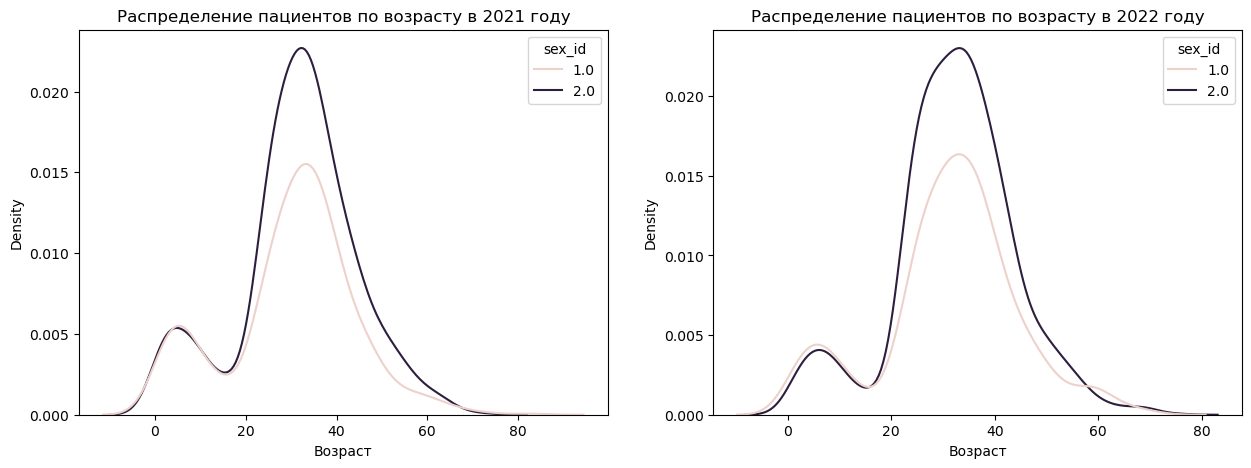

In [108]:
# постороим график распределения возрастов.
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(data=people_age_21, x='age_for_service_date', hue='sex_id')
plt.title('Распределение пациентов по возрасту в 2021 году')
plt.xlabel('Возраст')

ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(data=people_age_22, x='age_for_service_date', hue='sex_id')
plt.title('Распределение пациентов по возрасту в 2022 году')
plt.xlabel('Возраст')
plt.show()

Глобальных изменений нет, средний возраст увеличился на 1 год. Прверим, есть ли статистически значимая разница.

Н0: статистически значимой разницы в возрасте пациентов за 2021 и 2022 годы нет

Н1: статистически значимая разница в возрасте пациентов за 2021 и 2022 годы есть

In [97]:
results = st.ttest_ind(people_age_21['age_for_service_date'], people_age_22['age_for_service_date'])
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.007640778455202608
Отвергаем нулевую гипотезу


Есть статистически значимая разница в возрастах пациентов. Проверим, как возраст влияет на стоимость обслуживания.

In [98]:
print(data_2021['age_for_service_date'].corr(data_2021['service_amount']))

0.02099631172713259


Есть разница в возрасте, однако нет никакой свзяи между возрастом и стоимостью обслуживания. Гипотезу отвергаем.

### Средняя стоимость обслуживания пациентов увеличилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот)

In [90]:
# разделим стоимости услуг на диапазоны
def price_group(price):
    
    if price <= 1000:
        return '0-1000'
    if price <= 2000:
        return '1000-2000'
    if price <= 3000:
        return '2000-3000'
    if price <= 4000:
        return '3000-4000'
    if price <= 5000:
        return '4000-5000'
    if price > 5000:
        return 'более 5000'

In [70]:
data_2021['price_group'] = data_2021['service_amount'].apply(price_group)
data_2022['price_group'] = data_2022['service_amount'].apply(price_group)
pd.options.mode.chained_assignment = None

In [79]:
# сгруппируем данные по ценовым диапазонам и посчитаем количество
price_category_2021 = data_2021.groupby('price_group', as_index=False)['service_amount'].count()
price_category_2022 = data_2022.groupby('price_group', as_index=False)['service_amount'].count()

In [80]:
price_category = price_category_2021.merge(price_category_2022, how='inner', on='price_group')

# посчитаем доли каждой категории
price_category['proportion_2021'] = price_category['service_amount_x']/sum(price_category['service_amount_x'])
price_category['proportion_2022'] = price_category['service_amount_y']/sum(price_category['service_amount_y'])

# вычислим изменение
price_category['difference, %'] = ((price_category['proportion_2022'] - price_category['proportion_2021'])/price_category['proportion_2021'])*100

display(price_category)

,price_group,service_amount_x,service_amount_y,proportion_2021,proportion_2022,"difference, %"
0,0 - 1000,11854,16858,0.443372,0.411402,-7.210807
1,1000-2000,12627,20227,0.472285,0.493618,4.517152
2,2000-3000,1395,2619,0.052177,0.063914,22.494775
3,3000-4000,642,1027,0.024013,0.025063,4.373846
4,4000-5000,107,144,0.004002,0.003514,-12.191818
5,более 5000,111,102,0.004152,0.002489,-40.043888


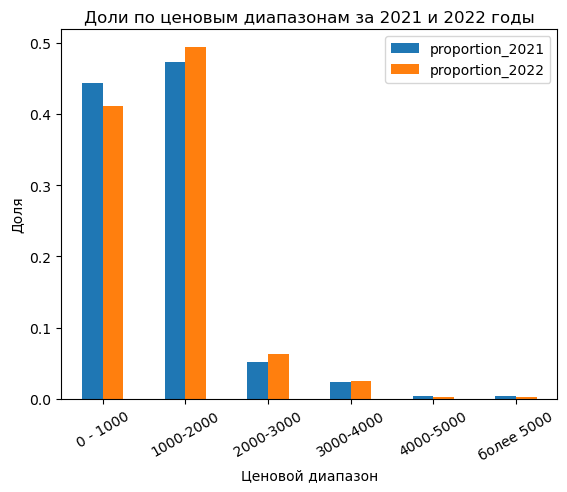

In [89]:
# построим график с пропорциями в катеогриях
price_category.plot(kind='bar', x='price_group', y=['proportion_2021', 'proportion_2022'])
plt.legend(['proportion_2021', 'proportion_2022'])
plt.title('Доли по ценовым диапазонам за 2021 и 2022 годы')
plt.xlabel('Ценовой диапазон')
plt.ylabel('Доля')
plt.xticks(rotation=30)
plt.show()

Мы видим, что дорогих услуг (стоимостью от 4000) в процентном соотношении стало значительно меньше, значит это не повлияло на изменение цен. Однако заметно, что стало меньше услуг стоимостью до 1000, а в диапазоне от 1000 до 4000 стало больше, особенно в пределах 2000-3000. Думаю, в среднем это могло повлиять на среднюю стоимость обслуживания, гипотезу не отвергаем.

## Вывод

В результате исследования было обнаружено, что средняя стоимость обслуживания в клинике в 2022 году относительно 2021 года увеличилась почти на 5%.

Были проверены 4 гипотезы, чтобы выявить факторы, влияющие на изменение цен:

 - гипотеза о том, что стоимость обслуживания увеличилась в связи с изменением цен на услуги подтвердилась. В среднем цена на одни и те же услуги увеличилась на 5.73%.
 - также не получилось отвергнуть гипотезу о том, что средняя стоимость обслуживания пациентов увеличилась из-за изменения структуры оказываемых услуг. Снизилось число услуг в диапазоне до 1000 рублей, при этом значительно уменьшилась и доля дорогих услуг стоимостью от 4000 рублей. Однако заметно также увеличилось число услуг в ценовом диапазоне 1000-4000, что глобально могло повлиять на изменение стоимости обслуживания, т.к они имеют большую долю в общем числе.
 - гипотезы о том, что средняя стоимость обслуживания увеличилась из-за изменения интенсивности лечения пациентов и из-за изменения поло-возрастной структуры обслуживаемых пациентов не подтвердились.